In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    

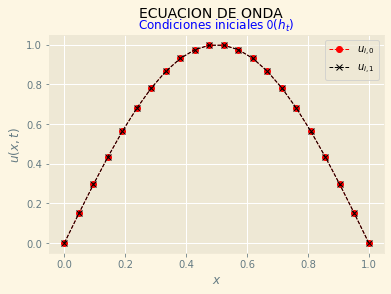

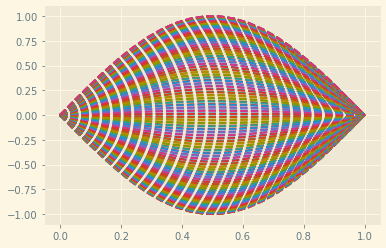

In [125]:
#Ejercicio 5

L = 1     #Longitud del dominio 
N = 20     #Numero de incognitas internas 
Tmax = 1.0    #Tiempo Maximo de simulacion 
ht = 0.005    #Paso del tiempo, se cambia de 0.5 a 0.005 para optener la solucion exacta
alpha = 2    #Dato fisico 
h = L / (N + 1)    #Tamaño de la malla espacial 

Nt = int(Tmax / ht)   #Numero total de pasos
lamb = alpha * ht / h   #parametro lambda 
Tmax = Nt * ht     #Tiempo total de simulacion 

def f(x):  #Funcion que se tiene que valuar 
    return np.sin(np.pi * x)

def g(x):   #Vi
    return 0

def solExacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)  #Solucion analitica 

def calcError(sol_n, sol_e):
    return np.abs(sol_n - sol_e)

def condicionesIniciales(l, ht, u, x, op=1):
    N = len(u)
    w = np.zeros(N)
    for i in range(1, N-1): 
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else: 
            w[i] = (1 - l**2) * u[i] + 0.5 * l**2 * (u[i+1] + u[i-1]) + ht * g(x[i])
    return w 

x = np.linspace(0,L,N+2)  #Coordenadas de la malla 
u = f(x)                  #Condicion inicial 
w = condicionesIniciales(lamb, ht, u, x, op=1) #Euler   :op = 1 
plt.suptitle('ECUACION DE ONDA', fontsize=14)
plt.plot(x, u, 'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w, 'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{0}(h_t)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')   #se le da nombre al eje y
plt.xlabel('$x$')        #se le da nombre al eje x
plt.legend(loc='upper right', ncol=1, framealpha= 0.75, fancybox = True, fontsize = 10)
plt.grid(color='w')
plt.subplots_adjust( hspace = 0.35 )
plt.savefig('condicion_03.pdf')
plt.show()

def solver(u, w, N, x, Nt, l):
    s = np.zeros(N+2)
    for n in range(1,Nt):
        for i in range (1,N+1):
            s[i] = 2 * (1 - l **2) * w[i] + l**2 * (w[i +1] + w[i -1]) - u[i]
        u = w.copy()
        w = s.copy()
            
        plt.plot(x,s,'--')
    return s

x_ = np.linspace(0,L,N+1)
w = condicionesIniciales(lamb, ht, u, x, op = 1) # Euler : op = 1
s = solver (u, w, N, x, Nt, lamb)



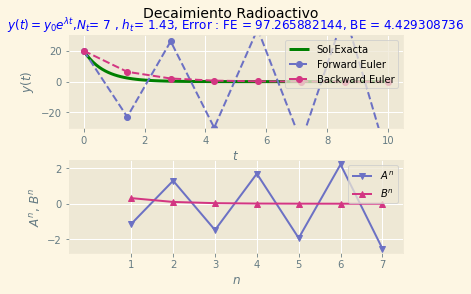

In [66]:
#Ejercicio 2

def mesh(a, b, Nt):
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

Nt = 7      #Se asignan valores los cuales iran cambiando 
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0

An=forwardEuler(yf, ht, lam)  #Se define An en el cuerpo del codigo 
Bn=backwardEuler(yf, ht, lam)   #Se define Bn en el cuerpo del codigo 
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')    #Se crea recueadro indicador de cada linea en la grafica
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)             #se escribe el codigo para crear las graficas 
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')         #se asigna nombre al eje x
ax2.set_ylabel('$A^n$, $B^n$')     #se asigna nombre al eje y 
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

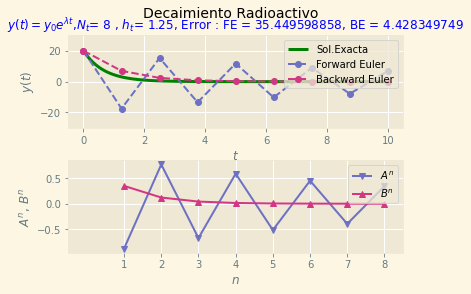

In [67]:
def mesh(a, b, Nt):
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

Nt = 8
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0

An=forwardEuler(yf, ht, lam)
Bn=backwardEuler(yf, ht, lam)
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

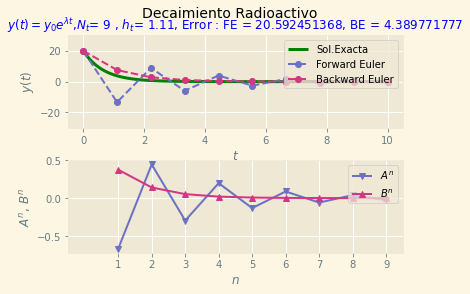

In [68]:
def mesh(a, b, Nt):
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

Nt = 9
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0

An=forwardEuler(yf, ht, lam)
Bn=backwardEuler(yf, ht, lam)
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

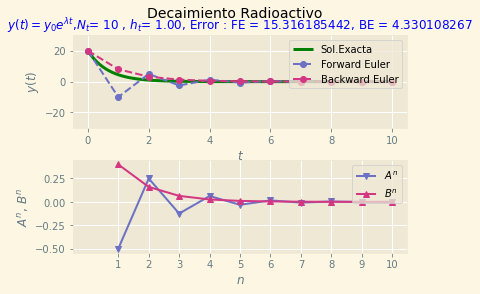

In [69]:
def mesh(a, b, Nt):
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

Nt = 10
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0

An=forwardEuler(yf, ht, lam)
Bn=backwardEuler(yf, ht, lam)
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

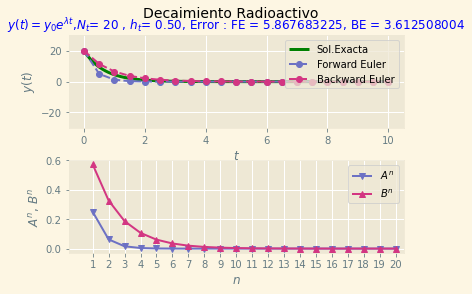

In [70]:
def mesh(a, b, Nt):
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

Nt = 20
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0

An=forwardEuler(yf, ht, lam)
Bn=backwardEuler(yf, ht, lam)
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

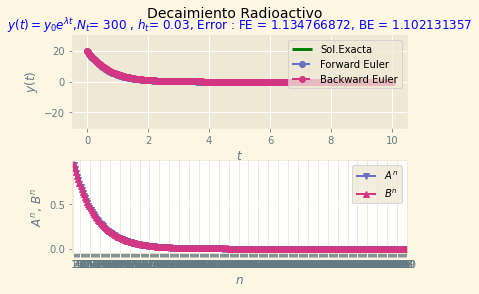

In [73]:
def mesh(a, b, Nt):
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

Nt = 300
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0

An=forwardEuler(yf, ht, lam)
Bn=backwardEuler(yf, ht, lam)
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()